<a href="https://colab.research.google.com/github/derkaiser9423/PythonPracticeProject/blob/master/2023_11_21_R_Ladies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

"""

TidyTuesday: R-Ladies

@author: tin

"""

In [ ]:
# Reset the environment
from IPython import get_ipython
get_ipython().magic('reset -sf')

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df =  pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2023/2023-11-21/rladies_chapters.csv', delimiter = ',')
print(df.head())

          id            chapter  \
0  296275584   rladies-st-louis   
1  296277517   rladies-coventry   
2  295898711  rladies-baltimore   
3  296346610     rladies-philly   
4  296275461   rladies-st-louis   

                                               title        date  location  \
0  Save the date! Introduction to ChatGPT for R c...  2023-11-30    online   
1          An basic introduction: Python for R Users  2023-11-30    online   
2               Holiday graphics and animations in R  2023-11-28  inperson   
3                  TidyTuesday with R-Ladies Philly!  2023-11-14    online   
4  Save the date! Introduction to Network Analysi...  2023-11-08    online   

   year  
0  2023  
1  2023  
2  2023  
3  2023  
4  2023  


In [ ]:
df = df.rename(columns = {'location': 'type'})
df['location'] = df['chapter'].str.replace('rladies-', '')

In [ ]:
print(df.head())

          id            chapter  \
0  296275584   rladies-st-louis   
1  296277517   rladies-coventry   
2  295898711  rladies-baltimore   
3  296346610     rladies-philly   
4  296275461   rladies-st-louis   

                                               title        date      type  \
0  Save the date! Introduction to ChatGPT for R c...  2023-11-30    online   
1          An basic introduction: Python for R Users  2023-11-30    online   
2               Holiday graphics and animations in R  2023-11-28  inperson   
3                  TidyTuesday with R-Ladies Philly!  2023-11-14    online   
4  Save the date! Introduction to Network Analysi...  2023-11-08    online   

   year   location  
0  2023   st-louis  
1  2023   coventry  
2  2023  baltimore  
3  2023     philly  
4  2023   st-louis  


In [ ]:
location_counts = df['location'].value_counts().sort_values(ascending=False).reset_index()
location_counts = location_counts.rename(columns={'location': 'counts', 'index': 'location'})
print(location_counts.head())

    location  counts
0         dc     134
1    newyork      91
2  guayaquil      89
3   montreal      88
4       ames      86


In [ ]:
location_counts = df.groupby(['location', 'type']).size().sort_values(ascending=False).reset_index(name='counts')

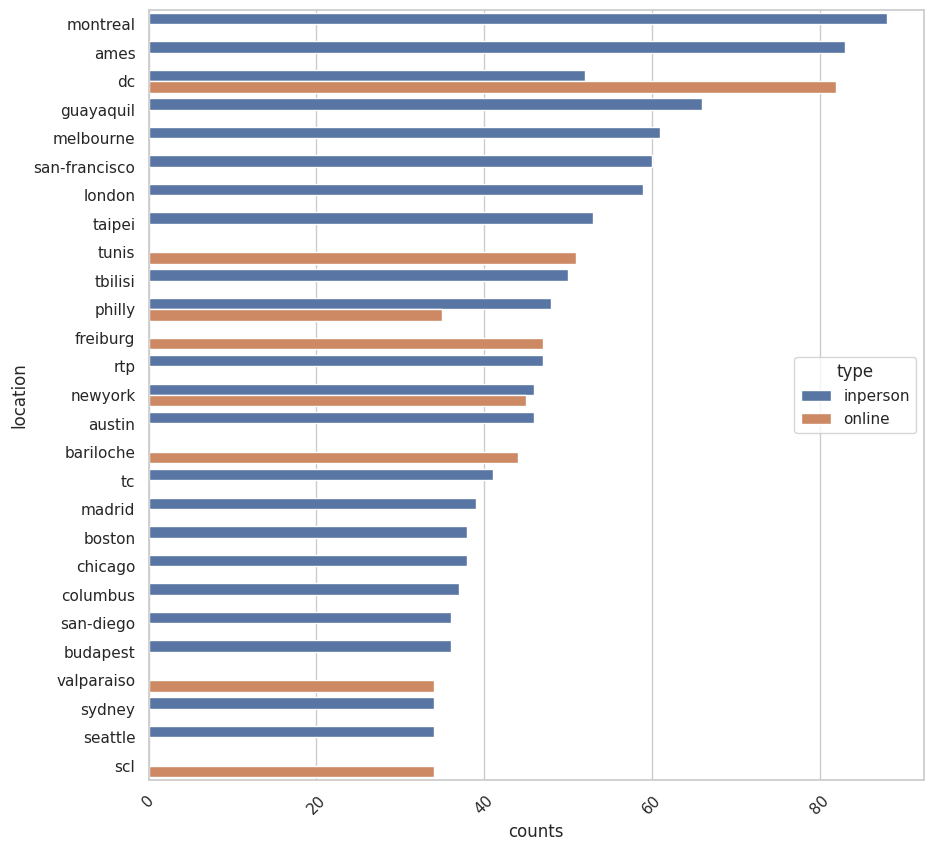

In [ ]:
plt.figure(figsize= (10,10))
sns.barplot(x= 'counts', y= 'location', hue= 'type', data = location_counts[:30], orient='h')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Create a pivot table to reshape the data for stacked bar chart
pivot_data_1 = location_counts.pivot_table(index='location', columns='type', values='counts', aggfunc='sum', fill_value=0)

In [ ]:
pivot_data_1['sum'] = pivot_data_1['online'] + pivot_data_1['inperson']

In [ ]:
# Sort columns based on the values in the last row (counts)
pivot_data_1= pivot_data_1.sort_values('sum', ascending=False).reset_index()

In [ ]:
pivot_data_1.set_index('location', inplace=True)

In [ ]:
pivot_data_1.drop(columns= ['sum'], inplace= True)

In [ ]:
print(pivot_data_1.head())

type       inperson  online
location                   
dc               52      82
newyork          46      45
guayaquil        66      23
montreal         88       0
ames             83       3


(array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160.]),
 [Text(0.0, 0, '0'),
  Text(20.0, 0, '20'),
  Text(40.0, 0, '40'),
  Text(60.0, 0, '60'),
  Text(80.0, 0, '80'),
  Text(100.0, 0, '100'),
  Text(120.0, 0, '120'),
  Text(140.0, 0, '140'),
  Text(160.0, 0, '160')])

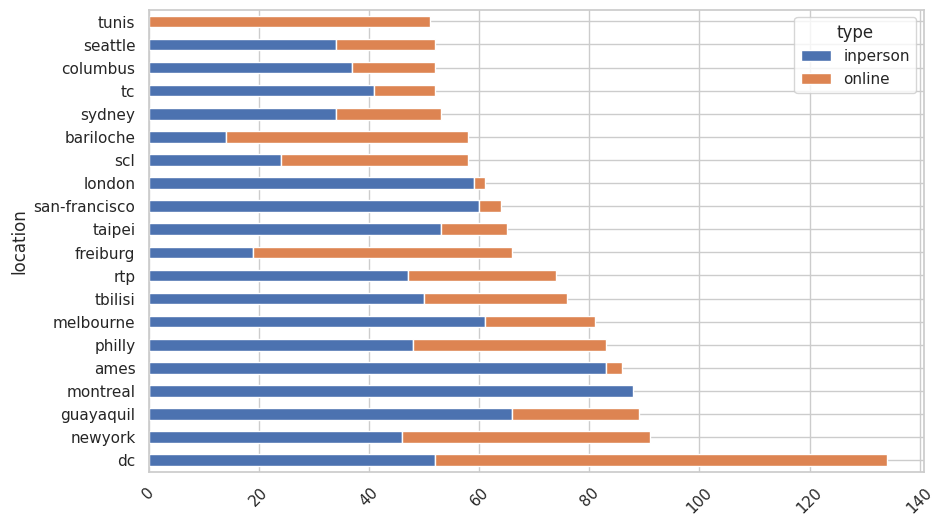

In [ ]:
# Create a stacked bar chart
ax = pivot_data_1[:20].plot(kind='barh', stacked=True, figsize=(10, 6))
plt.xticks(rotation= 45)

In [ ]:
year_counts = df.groupby(['type', 'year']).size().sort_values(ascending= False).reset_index(name= 'counts')
print(year_counts.head())

       type  year  counts
0  inperson  2019     902
1    online  2021     688
2    online  2020     655
3  inperson  2018     641
4  inperson  2017     374


In [ ]:
year_counts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    16 non-null     object
 1   year    16 non-null     int64 
 2   counts  16 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 512.0+ bytes


In [ ]:
year_counts = year_counts.sort_values(by='year')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, '2012'),
  Text(1, 0, '2013'),
  Text(2, 0, '2014'),
  Text(3, 0, '2015'),
  Text(4, 0, '2016'),
  Text(5, 0, '2017'),
  Text(6, 0, '2018'),
  Text(7, 0, '2019'),
  Text(8, 0, '2020'),
  Text(9, 0, '2021'),
  Text(10, 0, '2022'),
  Text(11, 0, '2023')])

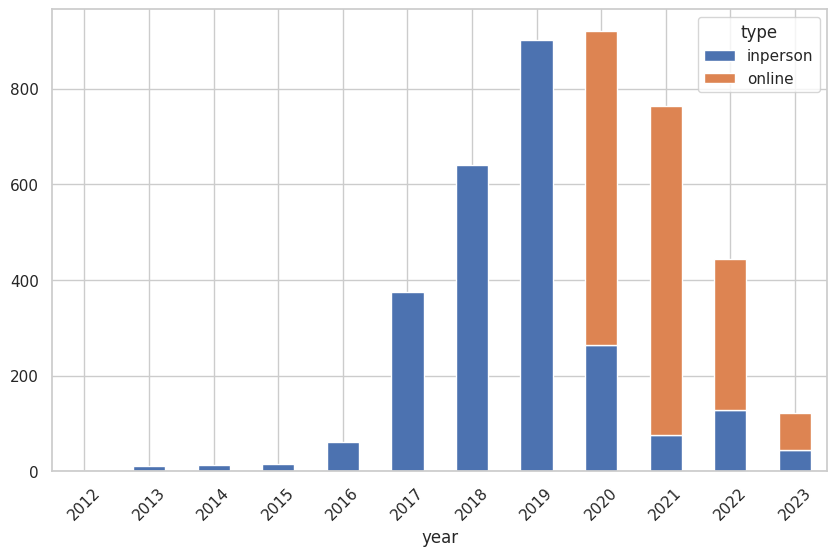

In [ ]:
# Create a pivot table to reshape the data for stacked bar chart
pivot_data_2 = year_counts.pivot_table(index='year', columns='type', values='counts', aggfunc='sum', fill_value=0)

# Create a stacked bar chart
ax = pivot_data_2.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xticks(rotation= 45)

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
titles = df['title'].tolist()

In [ ]:
def extract_keywords(title):
    stop_words = set(stopwords.words('english'))  # Customize this for other languages
    words = word_tokenize(title)
    return [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words]

In [ ]:
df['keywords'] = df['title'].apply(extract_keywords)

In [ ]:
print(df[['title', 'keywords']])

                                                  title  \
4267                                  Introduction to R   
4256  An Evening with Tammy Lee of Allstate Insuranc...   
4257            Let's meetup and work on our R projects   
4258                        Let's get together and hack   
4259                        Computing for Data Analysis   
...                                                 ...   
86    [Online] Lessons from COVID-19: Non-random Mis...   
87         Graficando al Centro de Ciencias Matemáticas   
88                          入門 AI 開源的生態系平台 Hugging Face   
90    Mastering R: An Intensive Crash Course for Dat...   
0     Save the date! Introduction to ChatGPT for R c...   

                                               keywords  
4267                                  [introduction, r]  
4256  [evening, tammy, lee, allstate, insurance, com...  
4257                   [let, meetup, work, r, projects]  
4258                         [let, get, together, hack]  
4

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
text = ' '.join(titles)
wordcloud = WordCloud(width=800, height=400, background_color='white', collocations=False, colormap='viridis').generate_from_text('\n'.join(titles))

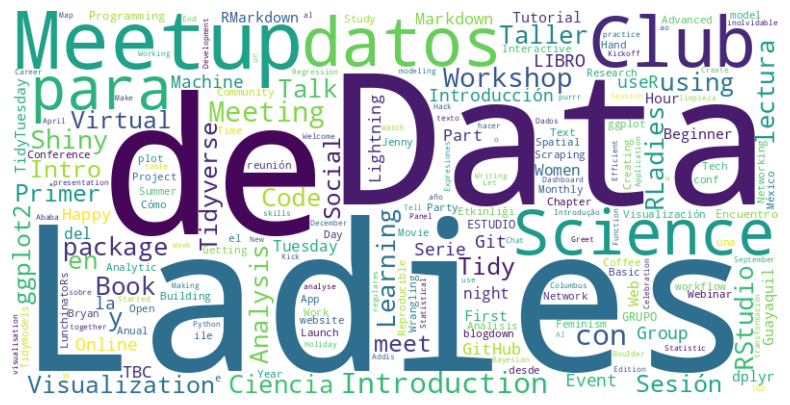

In [ ]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

In [ ]:
vectorizer = CountVectorizer()
title_matrix = vectorizer.fit_transform(df['title'])

In [ ]:
lda = LatentDirichletAllocation(n_components=5, random_state=42)  # Adjust the number of topics as needed
topic_matrix = lda.fit_transform(title_matrix)

In [ ]:
print(topic_matrix)

[[0.06666675 0.0670239  0.73086525 0.06758585 0.06785826]
 [0.01539132 0.93785214 0.0155498  0.01562053 0.0155862 ]
 [0.0250734  0.54691989 0.02595248 0.02561025 0.37644399]
 ...
 [0.03333781 0.0334241  0.86640466 0.03333642 0.03349702]
 [0.02290662 0.02226096 0.02253404 0.02267805 0.90962033]
 [0.02222349 0.02239171 0.02274133 0.91008338 0.02256009]]


In [ ]:
# Assuming 'df' is your DataFrame
dominant_topic = topic_matrix.argmax(axis=1)

# Add dominant topic information to the DataFrame
df['dominant_topic'] = dominant_topic
df = df.sort_values('dominant_topic', ascending= False).reset_index()
# Display the dominant topic for each document
print(df[['title', 'dominant_topic']].head(20))

                                                title  dominant_topic
0                Monthly R-Ladies Addis Ababa Meeting               4
1                                    Regressão Linear               4
2                              Charlar con R - Toma 3               4
3                     Data Visualization with ggplot2               4
4                                  Intro to Tidyverse               4
5   Taller LatinR - Expresiones regulares para la ...               4
6                      A Tour of NASA’s Data Universe               4
7   Cómo analizar la corrupción con datos de audit...               4
8   R Ladies Netherlands Book Club - Advanced R Ch...               4
9                       Navigating RStudio & R Basics               4
10                               Tech Holiday Party!                4
11  Como crear presentaciones asombrosas con Xaringan               4
12                    ¡Segunda reunión R-Ladies CDMX!               4
13                  

In [ ]:
# Display the top words for each topic
feature_names = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda.components_):
    top_keywords_idx = topic.argsort()[:-6:-1]
    top_keywords = [feature_names[i] for i in top_keywords_idx]
    print(f"Topic #{topic_idx + 1}: {', '.join(top_keywords)}")

Topic #1: de, datos, para, con, ciencia
Topic #2: ladies, code, meeting, and, meetup
Topic #3: with, club, to, rstudio, de
Topic #4: data, ladies, in, meetup, with
Topic #5: and, data, ladies, in, to
